<left>
<img src="idc_logo.png" width=100 align="left">
</left>

<H4>Advanced Stats. for Data Science (Spring 2022)</H4>

<H1>Examples from Lecture 7 </H1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import scipy
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size': 18})
%matplotlib inline
sns.set_style("white")

# ANOVA

Using the Wine Review Kaggle dataset https://www.kaggle.com/datasets/zynicide/wine-reviews

In [2]:
wine_df = pd.read_csv("winemag-data_first150k.csv")
lo_countries = ['Israel', 'Canada', 'India', 'Croatia', 'Hungary']
variable = 'points'

          Unnamed: 0       points        price     logPrice
count    1154.000000  1154.000000  1125.000000  1125.000000
mean    69120.781629    87.321490    33.786667     3.297199
std     42344.177758     2.701342    35.399459     0.618439
min        81.000000    80.000000     7.000000     1.945910
25%     31687.750000    85.000000    17.000000     2.833213
50%     68189.000000    87.000000    25.000000     3.218876
75%    102913.000000    89.000000    40.000000     3.688879
max    150727.000000    96.000000   764.000000     6.638568


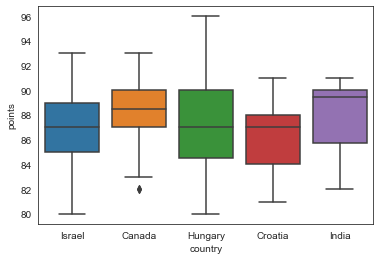

In [3]:
wine_df = wine_df[wine_df.country.isin(lo_countries)]
wine_df['logPrice'] = np.log(wine_df.price)
print(wine_df.describe())

sns.boxplot(x='country', y='points', data=wine_df); plt.show()

Question
- Q: do some countries produce better wine?

$$
H_0~:~\text{quality is unaffected by country}
$$
(flactuations are due to chance)

In [4]:
colors = sns.color_palette()

/Users/eyalmichaeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eyalmichaeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eyalmichaeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

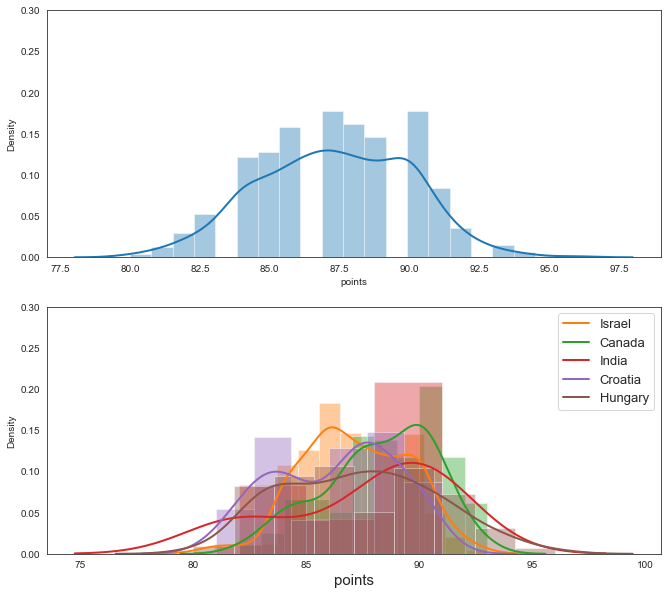

In [5]:
plt.figure(figsize=(11, 10))
plt.xlim(0, 8)
plt.subplot(211)
sns.distplot(wine_df[variable], kde_kws=dict(linewidth=2))
plt.ylim(0, .3)

plt.subplot(212)
plt.ylim(0, .3)
for i,name in enumerate(lo_countries):
    sns.distplot(wine_df[wine_df.country==name][variable], kde_kws=dict(linewidth=2), color=colors[i+1])
    

plt.legend(lo_countries, fontsize=13)
plt.xlabel(variable, fontsize=15)
plt.ylim(0, .3)
plt.show()


In [6]:
def ssquares(x):
    return np.sum((x - np.mean(x)) ** 2)

ss_wit = wine_df.groupby('country')[variable].agg(ssquares).sum()
ss_tot = np.sum((wine_df[variable] -  wine_df[variable].mean()) ** 2)

n = len(wine_df)
k = len(lo_countries)

ss_bet = ss_tot - ss_wit

MSE_bet = ss_bet / (k-1)
MSE_wit = ss_wit / (n-k)

F = MSE_bet / MSE_wit
print(f"F = {F}")
print(f"Pvalue = {scipy.stats.f.sf(F, k-1, n-k)}")


F = 9.731685808221775
Pvalue = 9.647683998909984e-08


### We can also use a statistical package:

In [12]:
wine_df.country.unique()

array(['Israel', 'Canada', 'Hungary', 'Croatia', 'India'], dtype=object)

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA Test 
model = ols('points ~ country', data=wine_df).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
country,275.706388,4.0,9.731686,9.647684e-08
Residual,8138.020648,1149.0,NaN,NaN


In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     9.732
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           9.65e-08
Time:                        19:05:19   Log-Likelihood:                -2764.5
No. Observations:                1154   AIC:                             5539.
Df Residuals:                    1149   BIC:                             5564.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             88.2398      0.190    464.187      0.000      87.867      88.613
country[T.Croatia]    -1.9589      0.340     -5.759      0.000      -2.626      -1.291
country[T.Hungary]    -0.9108      0.258     -3.524      0.000      -1.418      -0.404
country[T.India]      -0.6148      0.960     -0.640      0.522      -2.498       1.269
country[T.Israel]     -1.0636      0.218     -4.886      0.000      -1.491      -0.637
==============================================================================
Omnibus:                        8.068   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.028
Skew:                          -0.053   Prob(JB):                       0.0491
Kurtosis:                       2.662   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""